#### What is a decision tree?

"A decision tree uses a tree structure to represent a number of possible decision pathsand an outcome for each path."

- "They’re very easy to understand and interpret, and the process by which they reach a prediction is completely transparent."
- "decision trees can easily handle a mix of numeric and categorical attributes and can even classify data for which attributes are missing."

- "At the same time, finding an “optimal” decision tree for a set of training data is computationally a very hard problem."
- "More important, it is very easy (and very bad) to build decision trees that are overfitted to the training data, and that don’t generalize well to unseen data."

#### Entropy

"we’d like to choose questions whose answers give a lot of information about what our tree should predict. If there’s a single yes/no question for which 'yes' answers always correspond to True outputs and “no” answers to False outputs (or vice versa), this would be an awesome question to pick. Conversely, a yes/no question
for which neither answer gives you much new information about what the prediction should be is probably not a good choice."

"We capture this notion of 'how much information' with **entropy**. \[...\] We use it to represent the uncertainty associated
with data."

"Imagine that we have a set $S$ of data, each member of which is labeled as belonging to one of a finite number of classes $C_1, ..., C_n$."

- "If all the data points belong to a single class, then there is no real uncertainty, which means we’d like there to be low entropy."
- "If the data points are evenly spread across the classes, there is a lot of uncertainty and we’d like there to be high entropy."

"In math terms, if $p_i$ is the proportion of data labeled as class $c_i$ , we define the entropy as:"

$H(S) = - p_1\ \log_{2} p_1 - ... - p_n\ \log_{2} p_n$

with the (standard) convention that $0\ \log 0 = 0$.

"each term $− p_i \log_{2} p_i $ is non-negative and is close to zero precisely when p i is either close to zero or close to one".

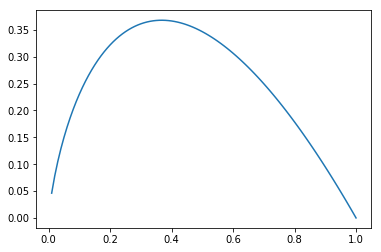

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ps = np.linspace(0.01,1.0,100)
ys = np.multiply(-ps,np.log(ps))

plt.plot(ps,ys)

"This means the entropy will be small when every $p_i$ is close to $0$ or $1$ (i.e., when most of the data is in a single class), and it will be larger when many of the $p_i$’s are not close to $0$ (i.e., when the data is spread across multiple classes)."

In [5]:
def entropy(class_probabilities):
    """
    given a list of class probabilities, compute the entropy
    """
    return sum(-p * math.log(p, 2) 
               for p in class_probabilities 
               if p) # ignore zero probs

"Our data will consist of pairs *(input, label)* , which means that we’ll need to compute the class probabilities ourselves. Observe that we don’t actually care which label is associated with each probability, only what the probabilities are:"

In [6]:
from collections import Counter

def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count 
            for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

#### The Entropy of a Partition

"we’d like some notion of the entropy that results from partitioning a set of data in a certain way. We want a partition to have low entropy if it splits the data into subsets that themselves have low entropy (i.e., are highly certain), and high entropy if it contains subsets that (are large and) have high entropy (i.e., are highly
uncertain)."

"Mathematically, if we partition our data $S$ into subsets $S_1 , ..., S_m$ containing proportions $q_1 , ..., q_m$ of the data, then we compute the entropy of the partition as a weighted sum:"

$H = q_1\ H(S_1) + ... + q_m\ H(S_m)$

In [7]:
def partition_entropy(subsets):
    """
    find the entropy from this partition of data into subsets
    subsets is a list of lists of labeled data
    """
    total_count = sum(len(subset) for subset in subsets)
    return sum( data_entropy(subset) * len(subset) / total_count 
               for subset in subsets )

"**One problem with this approach is that partitioning by an attribute with many different values will result in a very low entropy due to overfitting. \[...\] For this reason, you should probably try to avoid (or bucket, if appropriate) attributes with large numbers of possible values when creating decision trees.**"

#### Creating a Decision Tree

"Our tree will consist of decision nodes (which ask a question and direct us differently depending on the answer) and leaf nodes (which give us a prediction)."

##### ID3 algorithm

- "If the data all have the same label, then create a leaf node that predicts that label and then stop."
- "If the list of attributes is empty (i.e., there are no more possible questions to ask), then create a leaf node that predicts the most common label and then stop."
- "Otherwise, try partitioning the data by each of the attributes"
- "Choose the partition with the lowest partition entropy"
- "Add a decision node based on the chosen attribute"
- "Recur on each partitioned subset using the remaining attributes"

"This is what’s known as a 'greedy' algorithm because, at each step, it chooses the most immediately best option. Given a data set, there may be a better tree with a worse-looking first move. If so, this algorithm won’t find it. Nonetheless, it is relatively easy to understand and implement, which makes it a good place to begin
exploring decision trees."

#### Random Forests

"Given how closely decision trees can fit themselves to their training data, it’s not surprising that they have a tendency to overfit. One way of avoiding this is a technique called random forests, in which we build multiple decision trees and let them vote on how to classify inputs".

"Our tree-building process was deterministic, so how do we get random trees?":

- "One piece involves bootstrapping data. Rather than training each tree on all the inputs in the training set, we train each tree on the result of bootstrap_sample(inputs) . Since each tree is built using different data, each tree will be different from every other tree."
- "A second source of randomness involves changing the way we chose the
best_attribute to split on. Rather than looking at all the remaining attributes, we first choose a random subset of them and then split on whichever of those is best."